## # Generate Figure 2
Figure 2 : A. Population activity, for multiple simulations, reduced in PCA space, for different trials of the same synaptic reconfiguration (learning conditions). Population exhibits stereotypical trajectories that are stable despite intrinsic and stimulus noise. B. Population activity reduced in two principal components (PCAL2) over time for three different synaptic reconfigurations. Only delay period is plotted. Time is in seconds. C. Boxplot of number of clusters after k-means for n=2 structured network instances and for n=10 synaptic reshufflings, for n=50 stimulated trials.

Import necessary modules:

In [1]:
import notebook_module as nb
import analysis_tools as analysis
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from functools import partial
from pathlib import Path
%matplotlib notebook


Create figure 3C. 

Clustering with 1 clusters.
kmeans_clustering took 0.02606739999999874 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.031130400000002112 seconds.


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Clustering with 1 clusters.
kmeans_clustering took 0.05037659999999988 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.053844899999997864 seconds.


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Clustering with 1 clusters.
kmeans_clustering took 0.02153249999999929 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.023032099999998223 seconds.


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Cannot run kmeans with greater k than the data_pcapoints!
Clustering with 1 clusters.
kmeans_clustering took 0.13189069999999958 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.14094319999999882 seconds.
Clustering with 3 clusters.
kmeans_clustering took 0.14660590000000084 seconds.
Clustering with 4 clusters.
kmeans_clustering took 0.15295760000000058 seconds.
Clustering with 5 clusters.
kmeans_clustering took 0.1553161999999979 seconds.
Clustering with 6 clusters.
kmeans_clustering took 0.16605260000000044 seconds.
Clustering with 7 clusters.
kmeans_clustering took 0.16917210000000082 seconds.
Clustering with 8 clusters.
kmeans_clustering took 0.18473889999999926 seconds.
Clustering with 9 clusters.
kmeans_clustering took 0.18237120000000218 seconds.
Clustering with 10 clusters.
kmeans_clustering took 0.18813699999999756 seconds.
@k:10 k_means Overfit!!!
Curently plotting trial: 0


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Curently plotting trial: 1
Curently plotting trial: 2
Curently plotting trial: 3
Curently plotting trial: 4
Curently plotting trial: 5
Curently plotting trial: 6
Curently plotting trial: 7
Curently plotting trial: 8
Curently plotting trial: 9
Curently plotting trial: 10
Curently plotting trial: 11
Curently plotting trial: 12
Cannot run kmeans with greater k than the data_pcapoints!
Clustering with 1 clusters.
kmeans_clustering took 0.3875495999999998 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.378241899999999 seconds.
Clustering with 3 clusters.
kmeans_clustering took 0.3867440000000002 seconds.
Clustering with 4 clusters.
kmeans_clustering took 0.41705590000000115 seconds.
Clustering with 5 clusters.
kmeans_clustering took 0.4089717999999998 seconds.
Clustering with 6 clusters.
kmeans_clustering took 0.4330293999999988 seconds.
@k:6 k_means Overfit!!!


C:\Users\steve\AppData\Roaming\Python\Python37\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Curently plotting trial: 0
Curently plotting trial: 1
Curently plotting trial: 2
Curently plotting trial: 3
Curently plotting trial: 4
Curently plotting trial: 5
Curently plotting trial: 6
Curently plotting trial: 7
Curently plotting trial: 8
Curently plotting trial: 9
Curently plotting trial: 10
Curently plotting trial: 11
Curently plotting trial: 12
Curently plotting trial: 13
Curently plotting trial: 14
Curently plotting trial: 15
Clustering with 1 clusters.
kmeans_clustering took 0.013512099999999805 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.01533680000000004 seconds.
Clustering with 1 clusters.
kmeans_clustering took 0.02824690000000274 seconds.
We have only one cluster, so skipping test for overfit.
Clustering with 2 clusters.
kmeans_clustering took 0.032634500000000344 seconds.
Clustering with 1 clusters.
kmeans_clustering took 0.025913499999997924 seconds.
We have only one cluster, so skipping test for 

c:\users\steve\anaconda3\envs\publication\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


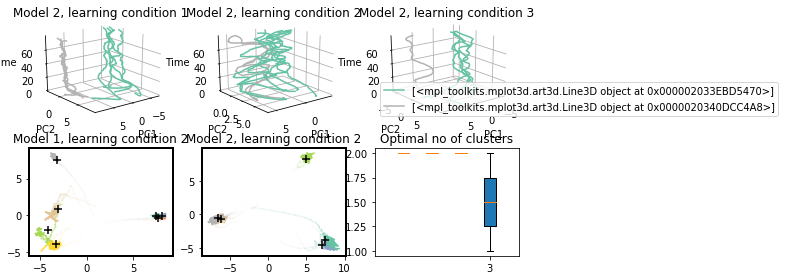

In [2]:
# Do only figures that will probably not change much.
simulations_dir = Path.cwd().joinpath('simulations')
plt.rcParams.update({'font.family': 'Helvetica'})
#===============================================================================
#===============================================================================
# FIGURE 1 (PENDING)
#===============================================================================
#===============================================================================
# FIGURE 2
subplot_width = 3
subplot_height = 2
plt.ion()
figure2 = plt.figure(figsize=plt.figaspect(0.5))
figure2_axis = np.zeros((subplot_height, subplot_width), dtype=object)
for idx in range(subplot_width):
    figure2_axis[0, idx] = figure2.add_subplot(
        subplot_height, subplot_width, idx + 1, projection='3d'
    )

y_array = np.linspace(0.1, 100, 1000)
y_i = 500
no_of_conditions = 2#10

# Plot same animal model, different learning conditions:
conditions = [1, 2, 3]
for idx, learning_condition in enumerate(conditions):
    NWBfile = analysis.load_nwb_file(
        animal_model=2,
        learning_condition=learning_condition,
        experiment_config='structured',
        type='bn',
        data_path=simulations_dir
    )

    trial_len = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfile,
        requested_parameters=['trial_len']
    )
    custom_range = (20, int(trial_len / 50))

    K_star, K_labels = analysis.determine_number_of_clusters(
        NWBfile_array=[NWBfile],
        max_clusters=no_of_conditions,
        y_array=y_array,
        custom_range=custom_range
    )

    # Plot the annotated clustering results:
    analysis.pcaL2(
        NWBfile_array=[NWBfile],
        klabels=K_labels[y_i, :].T,
        custom_range=custom_range,
        smooth=True, plot_3d=True,
        plot_axes=figure2_axis[0, idx]
    )


# Plot whole animal model state space:
for idx, animal_model in enumerate([1,2]):
    figure2_axis[1, idx] = figure2.add_subplot(
        subplot_height, subplot_width, 4 + idx
    )
    NWBfiles = [
        analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )
        for learning_condition in range(1, no_of_conditions + 1)
    ]

    trial_len, ntrials = analysis.get_acquisition_parameters(
        input_NWBfile=NWBfiles[0],
        requested_parameters=['trial_len', 'ntrials']
    )
    custom_range = (20, int(trial_len / 50))

    K_star, K_labels = analysis.determine_number_of_clusters(
        NWBfile_array=NWBfiles,
        max_clusters=no_of_conditions * ntrials,
        y_array=y_array,
        custom_range=custom_range
    )

    # Plot the annotated clustering results:
    analysis.pcaL2(
        NWBfile_array=NWBfiles,
        klabels=K_labels[y_i, :].T,
        custom_range=custom_range,
        smooth=True, plot_2d=True,
        plot_axes=figure2_axis[1, idx]
    )


# TODO: Plot number of clusters per animal/condition (na dw)
# Run for every learning condition and animal the k-means clustering:
figure2_axis[1, 2] = figure2.add_subplot(
    subplot_height, subplot_width, 6
)
no_of_animals = 4
optimal_clusters_of_group = defaultdict(partial(np.ndarray, 0))
for animal_model in range(1, no_of_animals + 1):
    # Pool together no of clusters for one animal model:
    K_star_over_trials = np.zeros((no_of_conditions, 1))
    for learning_condition in range(1, no_of_conditions + 1):
        # Lazy load the data as a NWB file. Easy to pass around and
        # encapsulates info like trial length, stim times etc.
        #TODO: this might raised some exceptions. Investigate!
        nwbfile = analysis.load_nwb_file(
            animal_model=animal_model,
            learning_condition=learning_condition,
            experiment_config='structured',
            type='bn',
            data_path=simulations_dir
        )

        trial_len = analysis.get_acquisition_parameters(
            input_NWBfile=nwbfile,
            requested_parameters=['trial_len']
        )

        # TODO: Where is custom range needed? determine a global way
        # of passing it around...
        custom_range = (20, int(trial_len / 50))

        K_star, K_labels = analysis.determine_number_of_clusters(
            NWBfile_array=[nwbfile],
            max_clusters=no_of_conditions,
            y_array=y_array,
            custom_range=custom_range
        )

        K_star_over_trials[learning_condition - 1, :] = \
            K_star[y_i]

    optimal_clusters_of_group[nb.datasetName(animal_model)] = \
        K_star_over_trials



figure2_axis[1, 2].set_title('Optimal no of clusters')
bplots = []
for pos, animal in enumerate(range(1, no_of_animals + 1)):
    bp = figure2_axis[1, 2].boxplot(
        optimal_clusters_of_group[nb.datasetName(animal)],
        positions=[pos],
        widths=0.4,
        patch_artist=True
    )
figure2_axis[1, 2].set_xlim(-1, 4)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.20)

plt.show()


In [3]:
figure2.savefig('Figure_2.svg')
print('Tutto pronto!')

Tutto pronto!
